# Michael Melillo
# 11/22/2024
# Analysis Report

### Hypothesis: The first album Apetite For Destruction by Guns N Roses will have higher average loudness levels compared to the Use Your Illusion II Album. 

**Explain the theoretical and the statistical applications of your hypothesis.**

**Theoretical Application:** The hypothesis suggests Apetite for Destruction by Guns n' Roses may have higher loudness levels due to it being more of 
an aggressive rock album while Use Your Illusion II may have a mix of both aggressive and more softer songs making the average loudness lower
than Apetite For Destruction.  

**Statistical Application:** You can compare the average loudness of tracks from both albums by checking the data sets and seeing if the 
stats show a real difference in loudness levels.

**Source and structure of the data used in the report.**
The data used in my report was sourced from the Spotify API.  The structure includes two datasets,
one containing audio features like loudness, tempo, and acousticness for each track, and another 
contaning track data such as track name, popularity, and artist details.  Both of these
datasets were merged based on their track ID's for two specific albums.

**How the data might be reliable or unreliable**
The data from Spotify's API is probably reliable because it is sourced directly from Spotify. 
It could be unreliable if the data is not updated frequently which leads to
outdated information.

**Are there any limitations or caveats to the response objects that might alter your ability to test your hypothesis?**
The Spotify API might not have all the audio details for every track which can hurt my analysis.
Also, if we are looking at just a few tracks it could be hard to get clear results for
my analysis.

In [1]:
import urllib
import requests
import pandas as pd
import json
import base64

**Accessing Spotify API:** This function gets an access token from Spotify by sending a request with the SessionID and the SessionKey.  This is what will allow us to access 
Spotify's API

In [2]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url,
                            data = data,
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

**Reading Spotify API Keys:** Reading in the spotify keys Client_ID,Client_Secret.

In [3]:
keys = pd.read_csv(r"C:\Users\mmeli\Data in Emerging Media and Technology\Spotify-Keys_.txt")

In [4]:
#keys

**Obtaining Access Token Using Client ID and Client Secret** This line uses (get_session_token) function to get an access token from Spotify by passing the Client ID and Client Secret from they keys which allows us to access the spotify API.

In [5]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])


200


In [6]:
access_token


'BQAQEOqpf99t7qSfTGL_zjRnuPjtQDxZuA77BHS3LALnOp2ePXM7-bKDncMWlYal6jj-MSL4CSXzIt2k7LnlQ60y2KC6O8uw5SY7lrtiFZ3VhY3Z3Hk'

**Fetching Track Audio Features and Album ID's:**  Getting the audio features and information about the tracks as well as a place holder for the Albums ID's. 

In [7]:
g_features_alb = 'https://api.spotify.com/v1/audio-features'
tracks_ab = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

**Endpoint -** The api call function makes a GET request to the API and then will return it as a .Json

In [8]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [9]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

**URI:** Getting the Album ID's URI from spotify

In [10]:
afd_album_id = '28yHV3Gdg30AiB8h8em1eW'
uyi_album_id = '00eiw4KOJZ7eC3NBEpmH4C'

In [11]:
ab_tracks_ep.format(afd_album_id)

'https://api.spotify.com/v1/albums/28yHV3Gdg30AiB8h8em1eW/tracks'

**Retreiving Track Data Using Album ID's:** This uses the api_call function to get track data from the album id's using the format, if we get 200 back then 
we are good to move on

In [12]:
afd_album_response = api_call(ab_tracks_ep.format(afd_album_id), session_header)
uyi_album_response = api_call(ab_tracks_ep.format(uyi_album_id), session_header)

200
200


**Data Frames -** Creating two data frames and then we are printing the Apetite for Destruction albums first few rows.  

In [13]:
afd_album_df = pd.DataFrame(afd_album_response['items'])
uyi_album_df = pd.DataFrame(uyi_album_response['items'])
afd_album_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,273480,True,{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,0G21yYKMZoHa30cYVi1iA8,Welcome To The Jungle,None,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,202693,True,{'spotify': 'https://open.spotify.com/track/58...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,58YL9Jo1T0wyijCOZWRmyL,It's So Easy,None,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,268213,True,{'spotify': 'https://open.spotify.com/track/7C...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,7CBFRsUz1pz1cS12soVhih,Nightrain,None,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,263573,True,{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,62pJJQjiTaTsFYFjDIYjYU,Out Ta Get Me,None,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,228586,True,{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,65G4Ib3w7tgLjUkO5GseN0,Mr. Brownstone,None,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0,False


**Combining -** This combines all track ID's from both albums

In [14]:
afd_track_ids = ','.join(afd_album_df['id'].to_list())
uyi_track_ids = ','.join(uyi_album_df['id'].to_list())

In [15]:
g_features_alb + '?ids={}'.format(afd_track_ids)

'https://api.spotify.com/v1/audio-features?ids=0G21yYKMZoHa30cYVi1iA8,58YL9Jo1T0wyijCOZWRmyL,7CBFRsUz1pz1cS12soVhih,62pJJQjiTaTsFYFjDIYjYU,65G4Ib3w7tgLjUkO5GseN0,6eN1f9KNmiWEhpE2RhQqB5,1NQPc9znr56Ci6f02HoLpg,4WPyOlL7E6ckUcCUzIKNJe,7snQQk1zcKl8gZ92AnueZW,4WWUSzyxCUengfmWvKCdhR,4x1iqAZIrfetO4o45KHhcC,0xaNdYwK8ZF3cHSjraQGC0'

**Fetching Audio Features for Tracks from Both Albums:** This line of code gets audio features from both albums tracks

In [16]:
afd_track_features = api_call(g_features_alb + '?ids={}'.format(afd_track_ids),
                             session_header)
uyi_track_features = api_call(g_features_alb + '?ids={}'.format(uyi_track_ids),
                             session_header)

200
200


This retrieves track information for both albums.

In [17]:
afd_track_info = api_call(tracks_ab + '?market=US&ids={}'.format(afd_track_ids),
                             session_header)
uyi_track_info = api_call(tracks_ab + '?market=US&ids={}'.format(uyi_track_ids),
                             session_header)

200
200


**Creating DataFrames for Audio Features of Both Albums:** This line of code creates DataFrames for audio features of both albums.

In [18]:
afd_features_df = pd.DataFrame(afd_track_features['audio_features'])
uyi_features_df = pd.DataFrame(uyi_track_features['audio_features'])
afd_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.454,0.987,8,-4.485,1,0.0881,0.0195,0.279000,0.268,0.316,123.610,audio_features,0G21yYKMZoHa30cYVi1iA8,spotify:track:0G21yYKMZoHa30cYVi1iA8,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,https://api.spotify.com/v1/audio-analysis/0G21...,273480,4
1,0.388,0.989,8,-6.181,1,0.1620,0.0206,0.000012,0.126,0.199,150.770,audio_features,58YL9Jo1T0wyijCOZWRmyL,spotify:track:58YL9Jo1T0wyijCOZWRmyL,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,https://api.spotify.com/v1/audio-analysis/58YL...,202693,4
2,0.393,0.995,1,-4.946,1,0.1030,0.1300,0.004610,0.263,0.198,148.196,audio_features,7CBFRsUz1pz1cS12soVhih,spotify:track:7CBFRsUz1pz1cS12soVhih,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,https://api.spotify.com/v1/audio-analysis/7CBF...,268213,4
3,0.395,0.988,11,-4.876,1,0.1110,0.0261,0.137000,0.353,0.365,140.848,audio_features,62pJJQjiTaTsFYFjDIYjYU,spotify:track:62pJJQjiTaTsFYFjDIYjYU,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,https://api.spotify.com/v1/audio-analysis/62pJ...,263573,4
4,0.491,0.974,8,-6.695,1,0.0487,0.0307,0.000003,0.274,0.527,106.269,audio_features,65G4Ib3w7tgLjUkO5GseN0,spotify:track:65G4Ib3w7tgLjUkO5GseN0,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,https://api.spotify.com/v1/audio-analysis/65G4...,228587,4


**Creating DataFrames for Track Information from Both Albums:** This creates DataFrames for track information from both albums.

In [19]:
afd_tracks_df = pd.DataFrame(afd_track_info['tracks'])
uyi_tracks_df = pd.DataFrame(uyi_track_info['tracks'])
afd_tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,273480,True,{'isrc': 'USGF18714801'},{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,0G21yYKMZoHa30cYVi1iA8,False,True,Welcome To The Jungle,80,None,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,202693,True,{'isrc': 'USGF18714802'},{'spotify': 'https://open.spotify.com/track/58...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,58YL9Jo1T0wyijCOZWRmyL,False,True,It's So Easy,60,None,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,268213,True,{'isrc': 'USGF18714803'},{'spotify': 'https://open.spotify.com/track/7C...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,7CBFRsUz1pz1cS12soVhih,False,True,Nightrain,63,None,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,263573,True,{'isrc': 'USGF18714804'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,62pJJQjiTaTsFYFjDIYjYU,False,True,Out Ta Get Me,53,None,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,228586,True,{'isrc': 'USGF18714805'},{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,65G4Ib3w7tgLjUkO5GseN0,False,True,Mr. Brownstone,61,None,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0


**Merging Features and Track Info DataFrames by Track IDs:** This merges the features and track info DataFrames based on the Track ID's. 

In [20]:
afd_merged = pd.merge(afd_features_df, afd_tracks_df, how='inner', on='id')
afd_merged.head(25)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.454,0.987,8,-4.485,1,0.0881,0.0195,0.279000,0.2680,0.316,...,{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,False,True,Welcome To The Jungle,80,None,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8
1,0.388,0.989,8,-6.181,1,0.1620,0.0206,0.000012,0.1260,0.199,...,{'spotify': 'https://open.spotify.com/track/58...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,False,True,It's So Easy,60,None,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL
2,0.393,0.995,1,-4.946,1,0.1030,0.1300,0.004610,0.2630,0.198,...,{'spotify': 'https://open.spotify.com/track/7C...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,False,True,Nightrain,63,None,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih
3,0.395,0.988,11,-4.876,1,0.1110,0.0261,0.137000,0.3530,0.365,...,{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,False,True,Out Ta Get Me,53,None,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU
4,0.491,0.974,8,-6.695,1,0.0487,0.0307,0.000003,0.2740,0.527,...,{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,False,True,Mr. Brownstone,61,None,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0
5,0.268,0.980,11,-5.959,1,0.1010,0.0190,0.006920,0.1820,0.390,...,{'spotify': 'https://open.spotify.com/track/6e...,https://api.spotify.com/v1/tracks/6eN1f9KNmiWE...,False,True,Paradise City,78,None,6,track,spotify:track:6eN1f9KNmiWEhpE2RhQqB5
6,0.459,0.970,8,-6.160,1,0.0582,0.1580,0.004960,0.4760,0.283,...,{'spotify': 'https://open.spotify.com/track/1N...,https://api.spotify.com/v1/tracks/1NQPc9znr56C...,False,True,My Michelle,57,None,7,track,spotify:track:1NQPc9znr56Ci6f02HoLpg
7,0.237,0.992,1,-5.215,1,0.1290,0.0424,0.007350,0.0754,0.258,...,{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WPyOlL7E6ck...,False,True,Think About You,51,None,8,track,spotify:track:4WPyOlL7E6ckUcCUzIKNJe
8,0.445,0.952,6,-5.321,1,0.0522,0.0900,0.084300,0.1120,0.624,...,{'spotify': 'https://open.spotify.com/track/7s...,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,False,True,Sweet Child O' Mine,84,None,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW
9,0.403,0.993,8,-4.436,1,0.1320,0.0139,0.015900,0.3990,0.267,...,{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WWUSzyxCUen...,False,True,You're Crazy,50,None,10,track,spotify:track:4WWUSzyxCUengfmWvKCdhR


Printing names of all columns in the afd merged DataFrame.

In [21]:
afd_merged.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'],
      dtype='object')

In [22]:
uyi_merged = pd.merge(uyi_features_df, uyi_tracks_df,
                     how = 'inner', on = 'id')
afd_merged['artist'] = "Apetite For Destruction"
uyi_merged['artist'] = "Use Your Illusion II"
afd_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

This combines the data from both albums into one DataFrame and stacks them.

In [23]:
albums_compare = pd.concat([afd_merged, uyi_merged], axis = 0)
albums_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.454,0.987,8,-4.485,1,0.0881,0.019500,0.279000,0.2680,0.316,...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,False,True,Welcome To The Jungle,80,None,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8,Apetite For Destruction
1,0.388,0.989,8,-6.181,1,0.1620,0.020600,0.000012,0.1260,0.199,...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,False,True,It's So Easy,60,None,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL,Apetite For Destruction
2,0.393,0.995,1,-4.946,1,0.1030,0.130000,0.004610,0.2630,0.198,...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,False,True,Nightrain,63,None,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih,Apetite For Destruction
3,0.395,0.988,11,-4.876,1,0.1110,0.026100,0.137000,0.3530,0.365,...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,False,True,Out Ta Get Me,53,None,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU,Apetite For Destruction
4,0.491,0.974,8,-6.695,1,0.0487,0.030700,0.000003,0.2740,0.527,...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,False,True,Mr. Brownstone,61,None,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0,Apetite For Destruction
5,0.268,0.980,11,-5.959,1,0.1010,0.019000,0.006920,0.1820,0.390,...,https://api.spotify.com/v1/tracks/6eN1f9KNmiWE...,False,True,Paradise City,78,None,6,track,spotify:track:6eN1f9KNmiWEhpE2RhQqB5,Apetite For Destruction
6,0.459,0.970,8,-6.160,1,0.0582,0.158000,0.004960,0.4760,0.283,...,https://api.spotify.com/v1/tracks/1NQPc9znr56C...,False,True,My Michelle,57,None,7,track,spotify:track:1NQPc9znr56Ci6f02HoLpg,Apetite For Destruction
7,0.237,0.992,1,-5.215,1,0.1290,0.042400,0.007350,0.0754,0.258,...,https://api.spotify.com/v1/tracks/4WPyOlL7E6ck...,False,True,Think About You,51,None,8,track,spotify:track:4WPyOlL7E6ckUcCUzIKNJe,Apetite For Destruction
8,0.445,0.952,6,-5.321,1,0.0522,0.090000,0.084300,0.1120,0.624,...,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,False,True,Sweet Child O' Mine,84,None,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW,Apetite For Destruction
9,0.403,0.993,8,-4.436,1,0.1320,0.013900,0.015900,0.3990,0.267,...,https://api.spotify.com/v1/tracks/4WWUSzyxCUen...,False,True,You're Crazy,50,None,10,track,spotify:track:4WWUSzyxCUengfmWvKCdhR,Apetite For Destruction


**Tidy DataFrame -** These lines of code remove the specified columns from the combined data allowing us to create a more tidy DataFrame.  

In [24]:
albums_compare_tidy = albums_compare.drop(columns = ['energy', 'key', 'danceability', 'mode', 'valence'])
albums_compare_tidy

,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,type_x,id,uri_x,track_href,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,-4.485,0.0881,0.019500,0.279000,0.2680,123.610,audio_features,0G21yYKMZoHa30cYVi1iA8,spotify:track:0G21yYKMZoHa30cYVi1iA8,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,False,True,Welcome To The Jungle,80,None,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8,Apetite For Destruction
1,-6.181,0.1620,0.020600,0.000012,0.1260,150.770,audio_features,58YL9Jo1T0wyijCOZWRmyL,spotify:track:58YL9Jo1T0wyijCOZWRmyL,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,False,True,It's So Easy,60,None,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL,Apetite For Destruction
2,-4.946,0.1030,0.130000,0.004610,0.2630,148.196,audio_features,7CBFRsUz1pz1cS12soVhih,spotify:track:7CBFRsUz1pz1cS12soVhih,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,False,True,Nightrain,63,None,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih,Apetite For Destruction
3,-4.876,0.1110,0.026100,0.137000,0.3530,140.848,audio_features,62pJJQjiTaTsFYFjDIYjYU,spotify:track:62pJJQjiTaTsFYFjDIYjYU,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,False,True,Out Ta Get Me,53,None,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU,Apetite For Destruction
4,-6.695,0.0487,0.030700,0.000003,0.2740,106.269,audio_features,65G4Ib3w7tgLjUkO5GseN0,spotify:track:65G4Ib3w7tgLjUkO5GseN0,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,False,True,Mr. Brownstone,61,None,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0,Apetite For Destruction
5,-5.959,0.1010,0.019000,0.006920,0.1820,100.316,audio_features,6eN1f9KNmiWEhpE2RhQqB5,spotify:track:6eN1f9KNmiWEhpE2RhQqB5,https://api.spotify.com/v1/tracks/6eN1f9KNmiWE...,...,https://api.spotify.com/v1/tracks/6eN1f9KNmiWE...,False,True,Paradise City,78,None,6,track,spotify:track:6eN1f9KNmiWEhpE2RhQqB5,Apetite For Destruction
6,-6.160,0.0582,0.158000,0.004960,0.4760,103.522,audio_features,1NQPc9znr56Ci6f02HoLpg,spotify:track:1NQPc9znr56Ci6f02HoLpg,https://api.spotify.com/v1/tracks/1NQPc9znr56C...,...,https://api.spotify.com/v1/tracks/1NQPc9znr56C...,False,True,My Michelle,57,None,7,track,spotify:track:1NQPc9znr56Ci6f02HoLpg,Apetite For Destruction
7,-5.215,0.1290,0.042400,0.007350,0.0754,170.656,audio_features,4WPyOlL7E6ckUcCUzIKNJe,spotify:track:4WPyOlL7E6ckUcCUzIKNJe,https://api.spotify.com/v1/tracks/4WPyOlL7E6ck...,...,https://api.spotify.com/v1/tracks/4WPyOlL7E6ck...,False,True,Think About You,51,None,8,track,spotify:track:4WPyOlL7E6ckUcCUzIKNJe,Apetite For Destruction
8,-5.321,0.0522,0.090000,0.084300,0.1120,125.304,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,...,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,False,True,Sweet Child O' Mine,84,None,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW,Apetite For Destruction
9,-4.436,0.1320,0.013900,0.015900,0.3990,122.192,audio_features,4WWUSzyxCUengfmWvKCdhR,spotify:track:4WWUSzyxCUengfmWvKCdhR,https://api.spotify.com/v1/tracks/4WWUSzyxCUen...,...,https://api.spotify.com/v1/tracks/4WWUSzyxCUen...,False,True,You're Crazy,50,None,10,track,spotify:track:4WWUSzyxCUengfmWvKCdhR,Apetite For Destruction


**Rearranging Data -** This will move the columns to the specified order allowing the track names to be next to loudness
for an easier analysis.

In [25]:
albums_compare_tidy = albums_compare_tidy[['name', 'loudness', 'speechiness', 'acousticness', 
                                           'instrumentalness', 'liveness', 'tempo', 'type_x', 
                                           'id', 'uri_x', 'external_ids', 'external_urls', 'href', 
                                           'is_local', 'is_playable', 'popularity', 'track_number', 
                                           'type_y', 'uri_y', 'artist']]

**Final Tidy DataFrame -** This is the final tidy DataFrame of both data sets.  

In [26]:
albums_compare_tidy

,name,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,type_x,id,uri_x,external_ids,external_urls,href,is_local,is_playable,popularity,track_number,type_y,uri_y,artist
0,Welcome To The Jungle,-4.485,0.0881,0.019500,0.279000,0.2680,123.610,audio_features,0G21yYKMZoHa30cYVi1iA8,spotify:track:0G21yYKMZoHa30cYVi1iA8,{'isrc': 'USGF18714801'},{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0G21yYKMZoHa...,False,True,80,1,track,spotify:track:0G21yYKMZoHa30cYVi1iA8,Apetite For Destruction
1,It's So Easy,-6.181,0.1620,0.020600,0.000012,0.1260,150.770,audio_features,58YL9Jo1T0wyijCOZWRmyL,spotify:track:58YL9Jo1T0wyijCOZWRmyL,{'isrc': 'USGF18714802'},{'spotify': 'https://open.spotify.com/track/58...,https://api.spotify.com/v1/tracks/58YL9Jo1T0wy...,False,True,60,2,track,spotify:track:58YL9Jo1T0wyijCOZWRmyL,Apetite For Destruction
2,Nightrain,-4.946,0.1030,0.130000,0.004610,0.2630,148.196,audio_features,7CBFRsUz1pz1cS12soVhih,spotify:track:7CBFRsUz1pz1cS12soVhih,{'isrc': 'USGF18714803'},{'spotify': 'https://open.spotify.com/track/7C...,https://api.spotify.com/v1/tracks/7CBFRsUz1pz1...,False,True,63,3,track,spotify:track:7CBFRsUz1pz1cS12soVhih,Apetite For Destruction
3,Out Ta Get Me,-4.876,0.1110,0.026100,0.137000,0.3530,140.848,audio_features,62pJJQjiTaTsFYFjDIYjYU,spotify:track:62pJJQjiTaTsFYFjDIYjYU,{'isrc': 'USGF18714804'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62pJJQjiTaTs...,False,True,53,4,track,spotify:track:62pJJQjiTaTsFYFjDIYjYU,Apetite For Destruction
4,Mr. Brownstone,-6.695,0.0487,0.030700,0.000003,0.2740,106.269,audio_features,65G4Ib3w7tgLjUkO5GseN0,spotify:track:65G4Ib3w7tgLjUkO5GseN0,{'isrc': 'USGF18714805'},{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65G4Ib3w7tgL...,False,True,61,5,track,spotify:track:65G4Ib3w7tgLjUkO5GseN0,Apetite For Destruction
5,Paradise City,-5.959,0.1010,0.019000,0.006920,0.1820,100.316,audio_features,6eN1f9KNmiWEhpE2RhQqB5,spotify:track:6eN1f9KNmiWEhpE2RhQqB5,{'isrc': 'USGF18714806'},{'spotify': 'https://open.spotify.com/track/6e...,https://api.spotify.com/v1/tracks/6eN1f9KNmiWE...,False,True,78,6,track,spotify:track:6eN1f9KNmiWEhpE2RhQqB5,Apetite For Destruction
6,My Michelle,-6.160,0.0582,0.158000,0.004960,0.4760,103.522,audio_features,1NQPc9znr56Ci6f02HoLpg,spotify:track:1NQPc9znr56Ci6f02HoLpg,{'isrc': 'USGF18714807'},{'spotify': 'https://open.spotify.com/track/1N...,https://api.spotify.com/v1/tracks/1NQPc9znr56C...,False,True,57,7,track,spotify:track:1NQPc9znr56Ci6f02HoLpg,Apetite For Destruction
7,Think About You,-5.215,0.1290,0.042400,0.007350,0.0754,170.656,audio_features,4WPyOlL7E6ckUcCUzIKNJe,spotify:track:4WPyOlL7E6ckUcCUzIKNJe,{'isrc': 'USGF18714808'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WPyOlL7E6ck...,False,True,51,8,track,spotify:track:4WPyOlL7E6ckUcCUzIKNJe,Apetite For Destruction
8,Sweet Child O' Mine,-5.321,0.0522,0.090000,0.084300,0.1120,125.304,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,{'isrc': 'USGF18714809'},{'spotify': 'https://open.spotify.com/track/7s...,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,False,True,84,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW,Apetite For Destruction
9,You're Crazy,-4.436,0.1320,0.013900,0.015900,0.3990,122.192,audio_features,4WWUSzyxCUengfmWvKCdhR,spotify:track:4WWUSzyxCUengfmWvKCdhR,{'isrc': 'USGF18714810'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WWUSzyxCUen...,False,True,50,10,track,spotify:track:4WWUSzyxCUengfmWvKCdhR,Apetite For Destruction


**Draws conclusions based on the data collected.**
Based on the data I collected, it appears that Apetite For Destruction has higher average
loudness levels than Use Your Illusion II which supports my hypothesis.  The loudness
could reflect the overall feel of each album and what the artist was trying to achieve
with their music.

**Reflects on the limitations of the data and analysis, propose alternative approaches, and discuss potential next steps.**
The data shows differences in loudness but it has limites because we are only focusing on
loudness and relying on Spotify's data. Reviews could help us get a better feel for the album
and it would be helpful to look at other features like tempo and rhythm for better comparison.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

**Track Name Vs Loudness of each album** In this section the code generated a scatter plot comparing the loudness levels of tracks
from *Appetite For Destruction* and *Use Your Illusion II*
**Track Names and Loudness**: The x-axis represents the track names, while the y-axis shows the loudness levels.
**Album Comparison**: Each album is represented by a different color—*Appetite For Destruction* in gold and *Use Your Illusion II* in blue.
**Purpose Of Plot**: This scatter plot helps us see visually how the loudness of tracks differs between the two albums, making it easier to identify patterns or outliers in the data.
**Rotating Track names** This helps usee rotate the track names so we can read the plot, some of the track names are long so they do not fit vertically 
on the graph. 

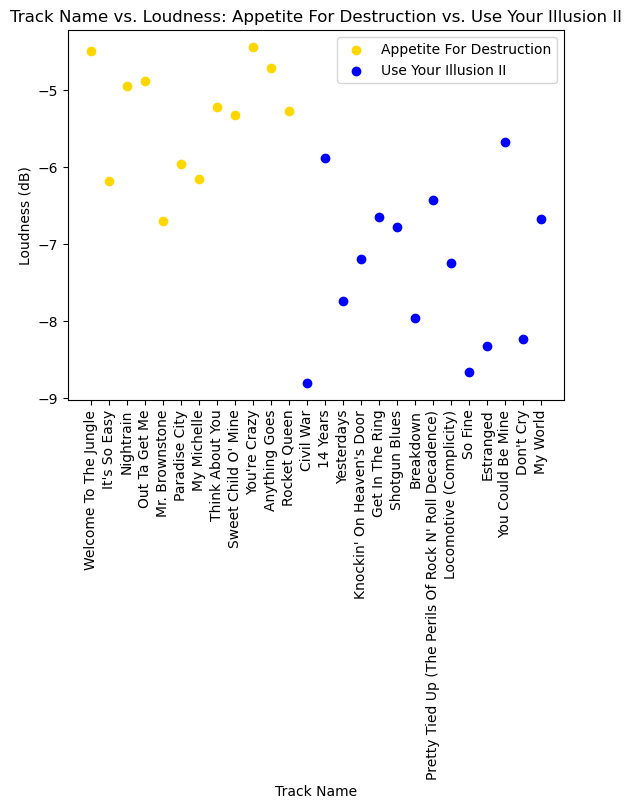

In [28]:

fig4, ax4 = plt.subplots()

ax4.scatter(afd_merged['name'], afd_merged['loudness'], color='gold', label='Appetite For Destruction')

ax4.scatter(uyi_merged['name'], uyi_merged['loudness'], color='blue', label='Use Your Illusion II')

ax4.set_xlabel('Track Name')
ax4.set_ylabel('Loudness (dB)')
ax4.set_title('Track Name vs. Loudness: Appetite For Destruction vs. Use Your Illusion II')
ax4.legend()
plt.xticks(rotation=90)



plt.show()


**Box Plot Analysis: Loudness Distribution Comparison**
**Loudness Data:** The afd_loudness and uyi_loudness variables hold the loudness values for tracks from both albums.
**Box Plot:**  The box plot shows us the spread in loudness accross both albums and their tracks.                                                        - x-axis represents both albums
 - The y-axis represents the tracks loudness for both albums.
 - This plot is important because it shows which album has a larger spread, you can see one is bigger than the otherwhich tells us exactly which album is louder overall

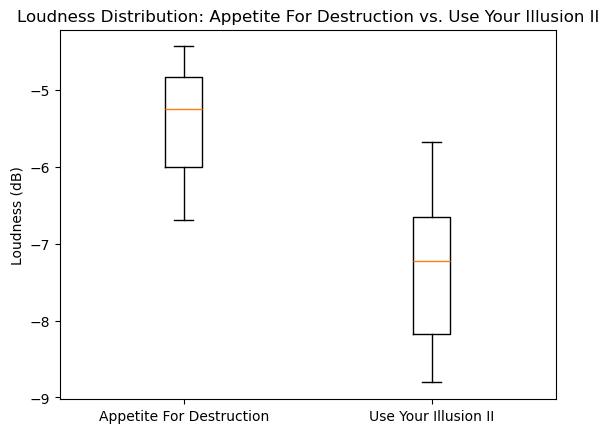

In [29]:
# Separating data of both albums
afd_loudness = afd_merged['loudness']
uyi_loudness = uyi_merged['loudness']

# Box plot comparing loudness of both albums
fig5, ax5 = plt.subplots()
ax5.boxplot([afd_loudness, uyi_loudness], tick_labels=['Appetite For Destruction', 'Use Your Illusion II'])
ax5.set_ylabel('Loudness (dB)')
ax5.set_title('Loudness Distribution: Appetite For Destruction vs. Use Your Illusion II')

plt.show()


**This tells us the lowest recorded loudness and highest recorded loudness values**

In [30]:
albums_compare_tidy = stats.describe(albums_compare_tidy['loudness'])
albums_compare_tidy.minmax

(-8.806, -4.436)

**This is the average loudness of tracks on both albums**

In [31]:
albums_compare_tidy.mean

-6.404961538461537

**Total number of tracks accross both albums**

In [33]:
albums_compare_tidy.nobs

26

**OLS Regression** This regression compares the average loudness between the two Albums

Use Your Illusion II is 1.9507 lower than Apetite For Destruction in loudness.  Apetite For Destruction has a higher average loudness.

In [35]:
afd_merged['album'] = 'Appetite For Destruction'
uyi_merged['album'] = 'Use Your Illusion II'

combined_df = pd.concat([afd_merged[['loudness', 'album']], uyi_merged[['loudness', 'album']]])

fit = smf.ols('loudness ~ album', data=combined_df).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     30.87
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.02e-05
Time:                        14:49:44   Log-Likelihood:                -32.893
No. Observations:                  26   AIC:                             69.79
Df Residuals:                      24   BIC:                             72.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -5.3546      0.258    -20.785      0.000      -5.886      -4.823
album[T.Use Your Illusion II]    -1.9507      0.351     -5.556      0.000      -2.675      -1.226
==============================================================================
Omnibus:                        1.816   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.067
Skew:                          -0.085   Prob(JB):                        0.587
Kurtosis:                       2.022   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion -** The hypothesis that Apetite For Destruction has higher average loudness levels than Use Your Illusion II is supported by my analysis. 
The box plot as well as the regression results both Show that Apetite For Destruction is consistently louder than Use Your illusion II.
The regression OLS showed that there was a difference of 1.9507 between the albums.  Apetite For Destruction was louder 
proving the hypothesis to be true. There was some limitations because we just focused on loudness, we also only used the Spotify API which could be
measured differently on other platforms like YouTube and Apple Music.  I was also able to make the assumption that Appetite For Destruction's style was
way more puchy than Use Your Illusion II. For alternative approaches I would like to also measure danceability, tempo and other factors that will tell
us the overall feel of the album in correlation with the loudness.  Overall I have found that the Album Apetite For Destruction has higher 
average loudness levels than Use Your Illusion II and the difference between the albums was very significant.
